# Cardio Vascular Model  
There are 3 types of input features:

Objective: factual information;
Examination: results of medical examination;
Subjective: information given by the patient.
Features:

Age | Objective Feature | age | int (days)
Height | Objective Feature | height | int (cm) |
Weight | Objective Feature | weight | float (kg) |
Gender | Objective Feature | gender | categorical code |
Systolic blood pressure | Examination Feature | ap_hi | int |
Diastolic blood pressure | Examination Feature | ap_lo | int |
Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
Smoking | Subjective Feature | smoke | binary |
Alcohol intake | Subjective Feature | alco | binary |
Physical activity | Subjective Feature | active | binary |
Presence or absence of cardiovascular disease | Target Variable | cardio | binary |
All of the dataset values were collected at the moment of medical examination.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('cardio_train.csv')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
df=df.drop(['id','age','gender','height'],axis=1)

In [4]:
df

,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,62.0,110,80,1,1,0,0,1,0
1,85.0,140,90,3,1,0,0,1,1
2,64.0,130,70,3,1,0,0,0,1
3,82.0,150,100,1,1,0,0,1,1
4,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
69995,76.0,120,80,1,1,1,0,1,0
69996,126.0,140,90,2,2,0,0,1,1
69997,105.0,180,90,3,1,0,1,0,1
69998,72.0,135,80,1,2,0,0,0,1


In [5]:
y=df['cardio']
x=df.drop(['cardio'],axis=1)
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(70000, 8)
(70000,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [6]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x,y)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [7]:
df.describe()

,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts=train_test_split(x,y,test_size=0.25)

In [9]:
print(xtr.shape)
print(xts.shape)
print(ytr.shape)
print(yts.shape)

(52500, 8)
(17500, 8)
(52500,)
(17500,)


In [22]:
lr.fit(xtr,ytr)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [23]:
yp=lr.predict(xts)

In [24]:
lr.score(xts,yts)

0.7169142857142857

In [25]:
# Adding cross Validation
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(lr,x,y,cv=5)
np.mean(cv_score)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

0.7185857142857144

In [26]:
# Confusion matrix & Classification Model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [27]:
confusion_matrix(yts,yp)

array([[6910, 1845],
       [3109, 5636]], dtype=int64)

In [28]:
print(classification_report(yts,yp))

              precision    recall  f1-score   support

           0       0.69      0.79      0.74      8755
           1       0.75      0.64      0.69      8745

    accuracy                           0.72     17500
   macro avg       0.72      0.72      0.72     17500
weighted avg       0.72      0.72      0.72     17500



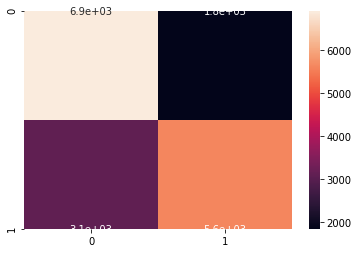

In [29]:
y_pred=lr.predict(xts)# prediction of data fit/trained from data on x test set
cm=confusion_matrix(yts,y_pred)#creating a confusion matrix of test set of y and predicted y set to s=check the values were true
sns.heatmap(cm,annot=True)

# Using Random Forest Classifier


In [32]:
from sklearn.ensemble import RandomForestClassifier
dec=RandomForestClassifier(n_estimators=50)#hyper parameter training
dec.fit(xtr,ytr)
#Evaluate the dec tree
print(dec.score(xts,yts))
yp1=dec.predict(xts)

0.7028571428571428


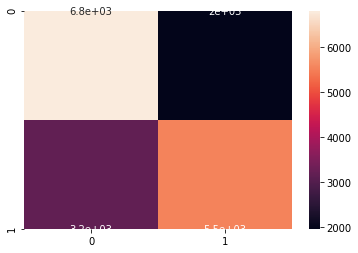

In [20]:
ca=confusion_matrix(yts,yp1)
sns.heatmap(ca,annot=True)

In [98]:
yp1=lr.predict([[]])#lr.predict(xts)
if yp1==0:
    print("Low Chances Of Cardio Vascular Disorder")
else:
    print("Higher Chances Of Cardio Vascular Disorder")

ValueError: Found array with 0 feature(s) (shape=(1, 0)) while a minimum of 1 is required.